In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\SANTOSH KUMAR SAHOO\Desktop\santosh.csv")
print(df.head())


   S. No.  Age        Sex                 RBC                     PCV  \
0     NaN        NaN    NaN  Red Blood Cell count  Packed Cell Volume   
1     1.0       28.0    0.0                  5.66                  34   
2     2.0       41.0    0.0                  4.78                44.5   
3     3.0       40.0    1.0                  4.65                41.6   
4     4.0       76.0    0.0                  4.24                36.7   

              MCV                     MCH   MCHC    \
0  Mean Cell Volume  Mean Cell Hemoglobin      NaN   
1              60.1                    17     28.2   
2              93.1                  28.9     31.0   
3              89.5                  28.8     32.2   
4              86.6                  26.7     30.8   

                       RDW                                TLC  PLT /mm3  \
0  Red Cell Distribution width  White Blood Cell (WBC count),  Platelet   
1                           20                           11.1     128.3   
2          

In [2]:
# Drop rows with missing values (if any)
df = df.dropna()
df

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...
360,360.0,17.0,0.0,4.86,39.2,80.7,27.7,34.4,13.4,4.4,180,13.5
361,361.0,51.0,0.0,4.85,35.2,91.7,31,33.8,13.3,5.6,215,15
362,362.0,21.0,1.0,4.47,39.7,88.7,29.3,33.0,13.5,9.2,329,13.1
363,363.0,35.0,1.0,4.75,36.2,86.7,27.9,32.1,13.5,6.48,174,13.2


In [3]:
print("Available columns:", df.columns)

Available columns: Index(['S. No.', 'Age      ', 'Sex  ', '  RBC    ', 'PCV', 'MCV  ', 'MCH',
       ' MCHC  ', ' RDW    ', 'TLC', ' PLT /mm3', ' HGB '],
      dtype='object')


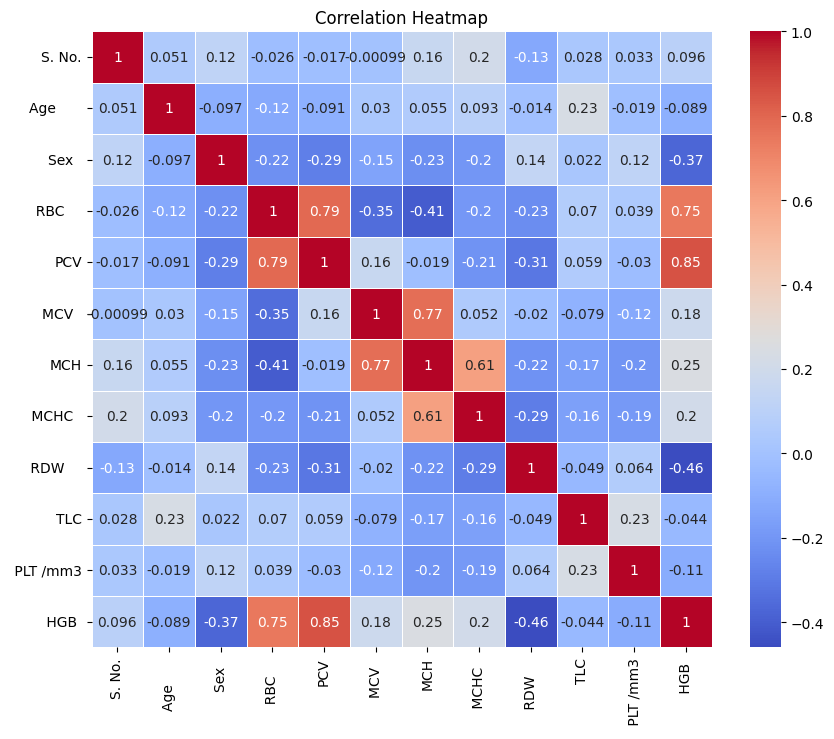

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
X = df.drop(columns=[' HGB '])  # using 'HGB' as the target column assuming it's the correct one
y = df[' HGB ']
df

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...
360,360.0,17.0,0.0,4.86,39.2,80.7,27.7,34.4,13.4,4.4,180,13.5
361,361.0,51.0,0.0,4.85,35.2,91.7,31,33.8,13.3,5.6,215,15
362,362.0,21.0,1.0,4.47,39.7,88.7,29.3,33.0,13.5,9.2,329,13.1
363,363.0,35.0,1.0,4.75,36.2,86.7,27.9,32.1,13.5,6.48,174,13.2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import  numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


# Step 3: Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Prediction
y_pred = model.predict(X_test)

# Step 5: Evaluation of the Model
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-Squared and Adjusted R-Squared
r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_train.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Step 6: Print Evaluation Metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R2): {r2}")
print(f"Adjusted R-Squared: {adj_r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Squared Error (MSE): 0.1978603076002189
Root Mean Squared Error (RMSE): 0.4448149138689247
R-Squared (R2): 0.9630860736711248
Adjusted R-Squared: 0.956429464005262
Mean Absolute Percentage Error (MAPE): 0.0301571649078361


In [23]:
print(pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}))

    Actual  Predicted
194    9.5   9.458744
34    10.3  10.713469
16    14.3  14.234572
348   13.1  12.649479
58      11  11.479464
..     ...        ...
203   14.2  14.186030
83    10.7  10.732747
95       8   8.084236
193   11.9  11.983552
306   10.3  10.504394

[73 rows x 2 columns]
